In [ ]:
#subj 2 freq 440
subj_02_440_train = pd.read_csv('training4402.csv')
subj_02_440_experiment= pd.read_csv('Experiment Data 4402.csv')
subj_02_440 = pd.concat([subj_02_440_train,subj_02_440_experiment],axis=0)
subj_02_440['Trial Numbers']=np.arange(0,55,1)
#subj_02_440['Result'] = subj_02_440['Result'].replace({'wrong':0})
#subj_02_440['Result'] = subj_02_440['Result'].replace({'correct':1})


#subj 2 freq 880
subj_02_880_train = pd.read_csv('training8802.csv')
subj_02_880_experiment= pd.read_csv('Experiment Data 8802.csv')
subj_02_880 = pd.concat([subj_02_880_train,subj_02_880_experiment],axis=0)
subj_02_880['Trial Numbers']=np.arange(0,55,1)
#subj_02_880['Result'] = subj_02_880['Result'].replace({'wrong':0})
#subj_02_880['Result'] = subj_02_880['Result'].replace({'correct':1})


#subj 2 freq 1760
subj_02_1760_train = pd.read_csv('training17602.csv')
subj_02_1760_experiment= pd.read_csv('Experiment Data 17602.csv')
subj_02_1760 = pd.concat([subj_02_1760_train,subj_02_1760_experiment],axis=0)
subj_02_1760['Trial Numbers']=np.arange(0,55,1)
#subj_02_1760['Result'] = subj_02_1760['Result'].replace({'wrong':0})
#subj_02_1760['Result'] = subj_02_1760['Result'].replace({'correct':1})




Cutting off all the empty data

In [ ]:
def locate_second_wrong(data_table,key_column):
    count_wrong = 0
    for index, value in enumerate (data_table[key_column]):
        if value == 'wrong':
            count_wrong += 1
            if count_wrong ==2:
                return index

def locate_last_wrong(data_table,key_column):
    count_wrong = 0
    for index, value in enumerate (data_table[key_column]):
        if value == 'wrong':
            count_wrong += 1
            if count_wrong ==4:
                return index

In [ ]:
cut_subj_02_440 = subj_02_440[:locate_last_wrong(subj_02_440,'Result') +1]
cut_subj_02_880 = subj_02_880[:locate_last_wrong(subj_02_880,'Result') +1]
cut_subj_02_1760 = subj_02_1760[:locate_last_wrong(subj_02_1760,'Result') +1]

In [ ]:
#subj_02_440

#x = trial numbers
#y = differnece
#different labels for the right and wrongs
# replace correct = 1 , and wrong = 0
# replace all empty cells with NaN

# y = subj_02_440('Note_difference')
# x = subj_02_440('Trial Number')

#subj_02_440['Result'] = subj_02_440['Result'].replace({0:np.nan})
#print(subj_02_440)

#cut_subj_02_440

making the x and y for each frequencies

In [ ]:
np.array(cut_subj_02_440)
x_s2_440 = cut_subj_02_440['Trial Numbers']
y_s2_440 = cut_subj_02_440['note_difference']

np.array(cut_subj_02_880)
x_s2_880 = cut_subj_02_880['Trial Numbers']
y_s2_880 = cut_subj_02_880['note_difference']

np.array(cut_subj_02_1760)
x_s2_1760 = cut_subj_02_1760['Trial Numbers']
y_s2_1760 = cut_subj_02_1760['note_difference']


In [ ]:
result = cut_subj_02_440['Result']
correct_trials = result == 'correct'
incorrect_trials = result == 'wrong'

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(x_s2_440[:6],y_s2_440[:6],'r--',label = '440 training')
ax.plot(x_s2_880[:6],y_s2_880[:6],'g--',label = '880 training')
ax.plot(x_s2_1760[:6],y_s2_1760[:6],'b--',label = '1760 training')
ax.plot(x_s2_440[5:],y_s2_440[5:],'r-',label = '440 experiment')
ax.plot(x_s2_880[5:],y_s2_880[5:],'g-',label = '880 experiment')
ax.plot(x_s2_1760[5:],y_s2_1760[5:],'b-',label = '1760 experiment')


ax.plot(x_s2_440[correct_trials],y_s2_440[correct_trials],'ro',label = '440 correct')
ax.plot(x_s2_440[incorrect_trials],y_s2_440[incorrect_trials],'rx',label = '440 incorrect')
#ax.plot(x,y_pos,'go',label = 'correct') 
#ax.plot(x,y_neg,'bo',label = 'wrong') 
#repeat 3 times for 3 frequences (6 more graphs for the dots)

ax.legend()
ax.set_xlabel('Trial Number',fontsize = 16)
ax.set_ylabel('Frequency Difference',fontsize = 16)
plt.show()


In [ ]:
result = cut_subj_02_440['Result']
correct_trials = result == 'correct'
incorrect_trails = result == 'wrong'

In [ ]:
correct_trials


how to graph the right and wrong

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

result = cut_subj_02_440['Result']
for xi,yi, resulti in zip(x_s2_440,y_s2_440,result):
    if resulti == 'wrong':
        marker = 'x'
    elif resulti == 'correct':
        marker = 'o'
    ax.plot(xi,yi,marker=marker,color='r') 

result = cut_subj_02_880['Result']
for xi,yi, resulti in zip(x_s2_880,y_s2_880,result):
    if resulti == 'wrong':
        marker = 'x'
    elif resulti == 'correct':
        marker = 'o'
    ax.plot(xi,yi,marker=marker,color='g') 

result = cut_subj_02_1760['Result']
for xi,yi, resulti in zip(x_s2_1760,y_s2_1760,result):
    if resulti == 'wrong':
        marker = 'x'
    elif resulti == 'correct':
        marker = 'o'
    ax.plot(xi,yi,marker=marker,color='b') 

ax.plot(x_s2_440[:6],y_s2_440[:6],'r--',label = '440 training')
ax.plot(x_s2_880[:6],y_s2_880[:6],'g--',label = '880 training')
ax.plot(x_s2_1760[:6],y_s2_1760[:6],'b--',label = '1760 training')
ax.plot(x_s2_440[5:],y_s2_440[5:],'r-',label = '440 experiment')
ax.plot(x_s2_880[5:],y_s2_880[5:],'g-',label = '880 experiment')
ax.plot(x_s2_1760[5:],y_s2_1760[5:],'b-',label = '1760 experiment')

# Create the legend handles and labels
correct_patch = mpatches.Patch(label='O: Correct')
wrong_patch = mpatches.Patch(label='X: Wrong')

# Create the legend using the handles and labels
ax.legend(handles=[correct_patch, wrong_patch])

#ax.legend()
ax.set_xlabel('Trial Number',fontsize = 16)
ax.set_ylabel('Frequency Difference',fontsize = 16)
plt.show()

#ax.plot(xi,yi,marker=marker,label = '440 training') 


### re-writing the graph

hopefully to write a function so we don't have to hard code so much shit for EVERY SINGLE FREQUENCY PER PERSON

as you can see , i'm slowly going insane

In [ ]:
result = cut_subj_02_440['Result']
for x_s2_440i,y_s2_440i, resulti in zip(x_s2_440,y_s2_440,result):
    if resulti == 'wrong':
        marker = 'x'
    elif resulti == 'correct':
        marker = 'o'

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
ax.plot(x_s2_440i,y_s2_440i,marker=marker,label = '440 training') 

#ax.plot(x,y_pos,'go',label = 'correct') 
#ax.plot(x,y_neg,'bo',label = 'wrong') 
#repeat 3 times for 3 frequences (6 more graphs for the dots)

# loop, check each point
# if subj_02_440['results']==1, 
# show point plot as 'o' 
# else subj_02_440['results']==0, 
# show point plot as 'x'

ax.legend()
ax.set_xlabel('Trial Number',fontsize = 16)
ax.set_ylabel('Frequency Difference',fontsize = 16)
plt.show()


In [ ]:
import numpy as np
from numpy import random 
import pandas as pd
import simpleaudio as sa
from matplotlib import pyplot as plt

# Visuals go brr

reading CSV file

combining training and experiment

changing "wrong" = 0 and "right" = 1

### making the bar graph 

thought process:

* option 1
    * manually find the 2nd - 4th wrong in the data
    * find the mean, then graph each mean
* option 2
    * use code so to can find the 2nd to 4th error in the data for is
    * calculate the mean, then graph


Best using option 2
* write a function to find the 2nd-4th error in data, then return mean
* run function for all 3 subjects and 3 frequences (9 total times)


chatgpt brain storm

* make variable for # error
* get index of where the error is (2nd to last error)
* use index to find the df 
* add the df together and find the mean

In [ ]:
#subj_02_440_experiment
#subj_02_880_experiment
#subj_02_1760_experiment



In [ ]:
#subj_02_880


# function(argument which might be the data ?)
# find first error, ignore it
# find second error, save all df from 2nd error until end
# calculate mean by adding all df then dividing by # of df
# return: mean






In [ ]:
#subj_02_440_experiment


In [ ]:
second_w = locate_second_wrong(subj_02_440_experiment,'Result')
last_w = locate_last_wrong(subj_02_440_experiment,'Result')

s2_440_df = subj_02_440_experiment['note_difference']
np.mean(s2_440_df[second_w:last_w])


1.5940552493319244

bar graph

In [ ]:
def df_mean(data_frame):
    second_w = locate_second_wrong(data_frame,'Result')
    last_w = locate_last_wrong(data_frame,'Result')
    df = data_frame['note_difference']
    return np.mean(df[second_w:last_w])

In [ ]:
s2_440_mean = df_mean(subj_02_440_experiment)
s2_880_mean = df_mean(subj_02_880_experiment)
s2_1760_mean = df_mean(subj_02_1760_experiment)
s2_mean = [s2_440_mean,s2_880_mean,s2_1760_mean]


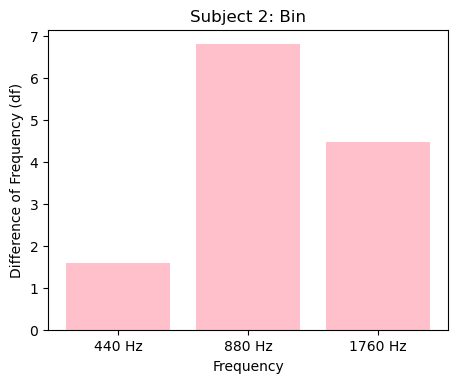

In [ ]:
freq_labels = ['440 Hz','880 Hz', '1760 Hz']

fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Frequency')
ax.set_ylabel('Difference of Frequency (df)')
ax.bar(freq_labels,s2_mean,color = 'pink')
ax.set_title("Subject 2: Bin")
plt.show()